In [1]:
import numpy as np
import matplotlib.pyplot as plt
import _pickle as pkl
import pandas as pd
import os,io,sys,glob, h5py, csv, time
import matplotlib.pyplot as plt
import json

from dlab import generalephys as ephys
from dlab import generalephys_mua as ephys_mua
#from neuropixels import cell_pairs as pairs

#from neuropixels import utils_pipeline as utils
#from neuropixels import analysis_pipeline as analysis

from dlab import analysis_pipeline as analysis
from dlab.continuous_traces import gaussian_filter1d
from scipy.signal import find_peaks
from scipy.stats import pearsonr, spearmanr, zscore
from itertools import combinations 
#from neuropixels import sorting_quality_editing as sq
from sklearn.manifold import TSNE
from scipy.cluster.vq import kmeans2
#from dlab import depth_estimation as depth
#from dlab import PCA as pca
from scipy import stats

import seaborn as sns
sns.set_style('white')
%matplotlib inline
%load_ext autoreload
%autoreload 2
sns.set_style("white")
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib
def get_swarm_xpos(ax):    
    swarm_xpos = []
    c = ax.get_children()

    i = 0
    while True:
        if isinstance(c[i], matplotlib.collections.PathCollection):
            x, _ = c[i].get_offsets().T
            if len(x) != 0:
                swarm_xpos.append(x.mean())
        else:
            break
        i += 1

    return swarm_xpos

In [3]:
def boxit(df_run,path,save=False):
    PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}}
    pval =stats.mannwhitneyu(df_run[df_run.cohort!='CUP']['overall_rate'],df_run[df_run.cohort!='cntrl']['overall_rate'])
    sem = list(df_run.groupby('cohort').overall_rate.sem())
    mn = list(df_run.groupby('cohort').overall_rate.mean())
    
    fig, (ax,ax1) = plt.subplots(1,2,figsize = (10,8))
    
    sns.boxplot(x='cohort',y='overall_rate',data=df_run,ax=ax,color='white',showfliers=False,**PROPS)
    sns.swarmplot(x='cohort',y='overall_rate',data=df_run,ax=ax,palette=dict(CUP="#d62728", cntrl="#3498db"))
    
    x_pos = get_swarm_xpos(ax)
    #ax.errorbar(x_pos,mn , yerr=sem,fmt = "_", color = "black", 
                #capsize = 15, markersize = 15, markeredgewidth = 1.5, elinewidth = 1.5,zorder=100)
    ax1.errorbar(x_pos,mn , yerr=sem,fmt = "_", color = "black", 
                capsize = 15, markersize = 15, markeredgewidth = 1.5, elinewidth = 1.5)
    ax.set_title('Timepoint2. p-value: ' + str(pval))
    plt.show()
    if save==True:
        fig.savefig(str(path))
    plt.close()

In [4]:
def swarmit(df_run,path):
    pval =stats.mannwhitneyu(df_run[df_run.cohort!='CUP']['log_rate'],df_run[df_run.cohort!='cntrl']['log_rate'])
    sem = list(df_run.groupby('cohort').log_rate.sem())
    mn = list(df_run.groupby('cohort').log_rate.mean())
    
    fig, (ax,ax1) = plt.subplots(1,2,figsize = (10,8))
    sns.swarmplot(x='cohort',y='log_rate',data=df_run,ax=ax,palette=dict(CUP="#d62728", cntrl="#3498db"))
    x_pos = get_swarm_xpos(ax)
    #ax.errorbar(x_pos,mn , yerr=sem,fmt = "_", color = "black", 
                #capsize = 15, markersize = 15, markeredgewidth = 1.5, elinewidth = 1.5,zorder=100)
    ax1.errorbar(x_pos,mn , yerr=sem,fmt = "_", color = "black", 
                capsize = 15, markersize = 15, markeredgewidth = 1.5, elinewidth = 1.5)
    ax.set_title('Timepoint2. p-value: ' + str(pval))
    plt.show()
    fig.savefig(str(path))
    plt.close()
#fig.savefig(r'Z:\BIOElectricsLab\Dailey\NPX_animalsummary_kim_04_2022\FiringRates\TimePoint2\t_test_FS.png')
#ax.set_yscale('log')

# load dfs

In [105]:
#startimes_path = r'D:\PIPELINE_INPUTS'
#ts_path = r'D:\PIPELINE_INPUTS\FIXED_videoTTLs'
#path = r'C:\Users\16623\Desktop\kim_analysis\kimcode_02.2020\PIPELINE'
path1 = r'Desktop'
path2 = r'C:\Users\Kim\Documents\Data\daileydata'
#df_peaks = pd.read_json(os.path.join(path2,'df_peaks.json'))
df_full = pd.read_json(os.path.join(path2,'df_DEPTHCORRECTED_11_11_21.json'))
#df_full = df_full[df_full.group=='good']
#df_reaches = pd.read_json(os.path.join(path2,'df_reaches_revised_042722.json'))
#df_ = pd.read_json(os.path.join(path2,'df_aligned_first20min.json'))
#df_ = df_[df_.group=='good']

#dfr_old =  pd.read_json(r'D:\kim_analysis\analysis_dailey\df_reaches_aligned_092621.json')
#df_start = pd.read_csv(os.path.join(startimes_path,'Neuropixels_ProcessorStartTimes.csv'))
#df_timestamps = pd.read_json(os.path.join(ts_path,'df_timestamps.json'))
#df_sq = pd.read_json(os.path.join(path,'df_sq_all_mice_09_02_21.json'))

In [10]:
df = df_full

In [21]:
df_pairs =  df

In [6]:
df = df_

In [11]:
df['timepoint'] = 1
df['aligned'] = 1

In [12]:
# change cohort name for specific mice
df['cohort'][df.mouse== 11] = 'CUP1'
df['aligned'][df.mouse== 11] = 'yes'
df['timepoint'][df.mouse== 11] = '1'

df['cohort'][df.mouse== 12] = 'CUP1'
df['aligned'][df.mouse== 12] = 'yes'
df['timepoint'][df.mouse== 12] = '1'

df['cohort'][df.mouse== 19] = 'CUP2'
df['aligned'][df.mouse== 19] = 'okay'
df['timepoint'][df.mouse== 19] = '2'


df['cohort'][df.mouse== 22] = 'CUP2'
df['aligned'][df.mouse== 22] = 'no'
df['timepoint'][df.mouse== 22] = '2'


df['cohort'][df.mouse== 24] = 'CUP2'
df['aligned'][df.mouse== 24] = 'no'
df['timepoint'][df.mouse== 24] = '2'

df['cohort'][df.mouse== 26] = 'CUP3'
df['aligned'][df.mouse== 26] = 'no'
df['timepoint'][df.mouse== 26] = '3'

df['cohort'][df.mouse== 28] = 'cntrl3'
df['aligned'][df.mouse== 28] = 'no'
df['timepoint'][df.mouse== 28] = '3'

df['cohort'][df.mouse== 43] = 'cntrl1'
df['aligned'][df.mouse== 43] = 'no'
df['timepoint'][df.mouse== 43] = '1'


df['cohort'][df.mouse== 49] = 'cntrl2'
df['aligned'][df.mouse== 49] = 'yes'
df['timepoint'][df.mouse== 49] = '2'

df['cohort'][df.mouse== 50] = 'cntrl1'
df['aligned'][df.mouse== 50] = 'no'
df['timepoint'][df.mouse== 50] = '1'

df['cohort'][df.mouse== 59] = 'cntrl2'
df['aligned'][df.mouse== 59] = 'no'
df['timepoint'][df.mouse== 59] = '2'


df['cohort'][df.mouse== 63] = 'CUP2'
df['aligned'][df.mouse== 63] = 'no'
df['timepoint'][df.mouse== 63] = '2'

df['cohort'][df.mouse== 67] = 'cntrl3'
df['aligned'][df.mouse== 67] = 'no'
df['timepoint'][df.mouse== 67] = '3'

df['cohort'][df.mouse== 70] = 'CUP3'
df['aligned'][df.mouse== 70] = 'no'
df['timepoint'][df.mouse== 70] = '3'


df['cohort'][df.mouse== 71] = 'CUP3'
df['aligned'][df.mouse== 71] = 'yes'
df['timepoint'][df.mouse== 71] = '3'

df['cohort'][df.mouse== 20] = 'CUP2'
df['aligned'][df.mouse== 20] = 'yes'
df['timepoint'][df.mouse== 20] = '2'


df['cohort'][df.mouse== 42] = 'cntrl1'
df['aligned'][df.mouse== 42] = 'okay'
df['timepoint'][df.mouse== 42] = '1'

df['cohort'][df.mouse== 47] = 'cntrl1'
df['aligned'][df.mouse== 47] = 'no'
df['timepoint'][df.mouse== 47] = '1'


df['cohort'][df.mouse== 51] = 'cntrl1'
df['aligned'][df.mouse== 51] = 'okay'
df['timepoint'][df.mouse== 51] = '1'

df['cohort'][df.mouse== 53] = 'CUP2'
df['aligned'][df.mouse== 53] = 'yes'
df['timepoint'][df.mouse== 53] = '2'

df['cohort'][df.mouse== 56] = 'cntrl2'
df['aligned'][df.mouse== 56] = 'yes'
df['timepoint'][df.mouse== 56] = '2'

df['cohort'][df.mouse== 58] = 'cntrl2'
df['aligned'][df.mouse== 58] = 'yes'
df['timepoint'][df.mouse== 58] = '2'

df['cohort'][df.mouse== 64] = 'CUP3' 
df['aligned'][df.mouse== 64] = 'yes'
df['timepoint'][df.mouse== 64] = '3'

df['cohort'][df.mouse== 65] = 'cntrl3'
df['aligned'][df.mouse== 65] = 'okay'
df['timepoint'][df.mouse== 65] = '3'


df['cohort'][df.mouse== 66] = 'CUP2' 
df['aligned'][df.mouse== 66] = 'yes'
df['timepoint'][df.mouse== 66] = '2'

df['cohort'][df.mouse== 68] = 'CUP3' 
df['aligned'][df.mouse== 68] = 'yes'
df['timepoint'][df.mouse== 68] = '3'

df['cohort'][df.mouse== 69] = 'CUP2' 
df['aligned'][df.mouse== 69] = 'okay'
df['timepoint'][df.mouse== 69] = '2'



In [104]:
df_run = df_[df_.timepoint=='3'].reset_index()

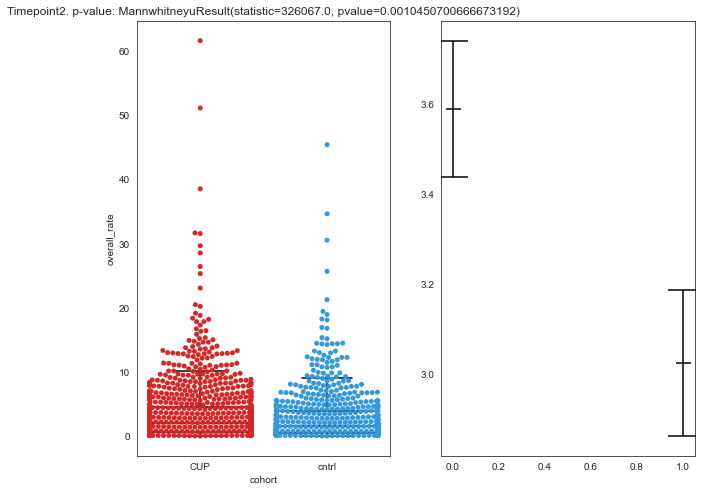

In [40]:
path = 'r'
boxit(df_run,path,save=False)

In [95]:
df_up = df[df.layer=='L2-3'][df.timepoint=='3'][df.waveform_class=='rs']
df_upr = df[df.layer=='L2-3'][df.timepoint=='3'][df.waveform_class=='fs']

df_up_5r = df[df.layer=='L5'][df.timepoint=='3'][df.waveform_class=='rs']
df_up_5f = df[df.layer=='L5'][df.timepoint=='3'][df.waveform_class=='fs']

In [96]:
PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}}

PROPSc = {
    'boxprops':{'facecolor':'none', 'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}}

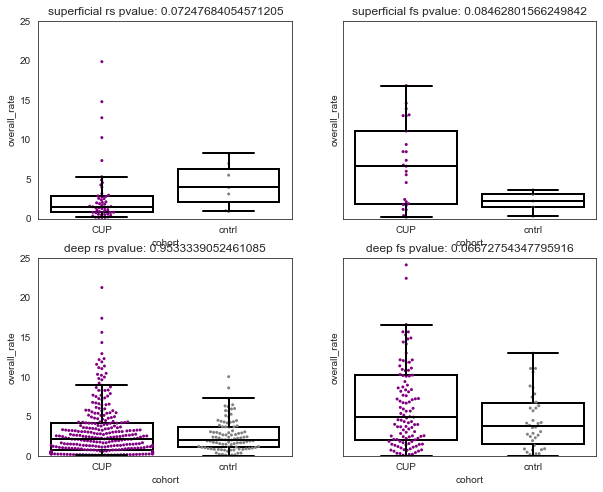

In [98]:
pval =stats.mannwhitneyu(df_up[df_up.cohort!='CUP']['overall_rate'],df_up[df_up.cohort!='cntrl']['overall_rate'])
pval2 =stats.mannwhitneyu(df_upr[df_upr.cohort!='CUP']['overall_rate'],df_upr[df_upr.cohort!='cntrl']['overall_rate'])
pval3 =stats.mannwhitneyu(df_up_5r[df_up_5r.cohort!='CUP']['overall_rate'],df_up_5r[df_up_5r.cohort!='cntrl']['overall_rate'])
pval4 =stats.mannwhitneyu(df_up_5f[df_up_5f.cohort!='CUP']['overall_rate'],df_up_5f[df_up_5f.cohort!='cntrl']['overall_rate'])

#sem = list(sem(cntrl))
#mn = list(df_run.groupby('cohort').log_epochfr.mean())

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize = (10,8),sharey=True,squeeze=True)
#fig, (ax3, ax4) = plt.subplots(1,2,figsize = (10,8),sharey=True)
g1 = sns.boxplot(x=df_up.cohort,y=df_up.overall_rate,ax=ax1,color='white',linewidth=2,zorder=10000000,showfliers=False,**PROPS)
g2 = sns.boxplot(x=df_upr.cohort,y=df_upr.overall_rate,ax=ax2,color='white',linewidth=2,zorder=10000000,showfliers=False,**PROPS)
g3 = sns.boxplot(x=df_up_5r.cohort,y=df_up_5r.overall_rate,ax=ax3,color='white',linewidth=2,zorder=10000000,showfliers=False,**PROPS)
g4 = sns.boxplot(x=df_up_5f.cohort,y=df_up_5f.overall_rate,ax=ax4,color='white',linewidth=2,zorder=10000000,showfliers=False,**PROPS)

g1 = sns.swarmplot(x=df_up.cohort,y=df_up.overall_rate,ax=ax1,size=3,palette=dict(cntrl="gray",CUP="purple"),zorder=1)
g2 = sns.swarmplot(x=df_upr.cohort,y=df_upr.overall_rate,ax=ax2,size=3,palette=dict(cntrl="gray", CUP="purple"),zorder=1)
g3 = sns.swarmplot(x=df_up_5r.cohort,y=df_up_5r.overall_rate, ax=ax3,size=3,palette=dict(cntrl="gray", CUP="purple"),zorder=1)
g4 = sns.swarmplot(x=df_up_5f.cohort,y=df_up_5f.overall_rate,ax=ax4,size=3,palette=dict(cntrl="gray", CUP="purple"),zorder=1)

ax1.set_title('superficial rs pvalue: ' + str(pval[1]))
ax2.set_title('superficial fs pvalue: ' +str(pval2[1]))
ax3.set_title('deep rs pvalue: ' +str(pval3[1]))
ax4.set_title('deep fs pvalue: ' +str(pval4[1]))

ax1.set_ylim(0,25)
ax2.set_ylim(0,25)
ax3.set_ylim(0,25)
ax4.set_ylim(0,25)

plt.show()
plt.close()
path = r'Z:\BIOElectricsLab\Kim\GRCmyelin_Figures\FiringRates\TP3.svg'
#fig.savefig(str(path))

# check dailey's methods paper firing rates

In [18]:
df_peaks = df

In [34]:
df.mouse.unique()

array([11, 12, 19, 20, 22, 24, 26, 42, 43, 47, 49, 50, 51, 53, 56, 58, 59,
       63, 64, 65, 66, 67, 68, 69, 70, 71], dtype=int64)

In [ ]:
11,12,19,20,22,24,26,43,47,49,50,53,59,63,64,66,67,68,69,70,71

In [175]:
df_20min = df

In [176]:
df = df_full

In [113]:
df_ = df

In [117]:
df = df_

In [88]:
df = df_peaks

In [114]:
df = df_full

In [115]:
df = df[df.mouse!=11][df.mouse!=12][df.mouse!=19][df.mouse!=20][df.mouse!=22][df.mouse!=24][df.mouse!=26][df.mouse!=43][df.mouse!=47][df.mouse!=49][df.mouse!=50][df.mouse!=53][df.mouse!=59][df.mouse!=53][df.mouse!=59][df.mouse!=63][df.mouse!=64][df.mouse!=66][df.mouse!=67][df.mouse!=68][df.mouse!=69][df.mouse!=70][df.mouse!=71]

In [116]:
df_full = df

In [90]:
df_peaks = df

In [92]:
df_peaks.mouse.unique()

array([56, 58, 65], dtype=int64)

In [27]:
df = df.reset_index()

In [41]:
df = df.drop('index',axis=1)

In [93]:
df_peaks = df_peaks.drop('level_0',axis=1)

KeyError: "['level_0'] not found in axis"

In [94]:
df_peaks = df_peaks.reset_index()

In [72]:
df_peaks.mouse.unique()

array([56, 58, 65], dtype=int64)

In [95]:
#remove potential autocorrelations

mxs = []
bigboi = []
shape = []
cells1 = []
cells2 = []

for i,p in enumerate(df_peaks.corrected_ccg):

    bins = 1000
    pair = np.array(p)
    pair = [np.sum(arr) for arr in np.array_split(pair, bins)]

    mx = np.max(pair)
    mxs.append(mx)
    a = np.arange(0,len(mxs))
    cell1 = df_peaks.cell1[i]
    cell2 = df_peaks.cell2[i]

    if mx>6: # number based on plot
        bigboi.append(pair)
        shape.append('bigboi')
        #plt.plot(t,pair)
        #plt.xlim(-.1,.1) 
        #plt.show()
        #plt.close()
        cells1.append(cell1)
        cells2.append(cell2)
    else:
        shape.append('notbigboi')

df_peaks['shapes'] = shape
df_peaks = df_peaks[df_peaks.shapes=='notbigboi']



In [96]:
cells1.extend(cells2)

In [97]:
np.shape(cells1)

(60,)

In [100]:
df = df_

In [101]:
for i in cells1:
    df = df[df.cell!=i]
        

In [102]:
df

,group,times,template,waveform_weights,xpos,ypos,mouse,experiment,probe,cell,...,waveform_PTratio,waveform_repolarizationslope,waveform_class,depth,layer,surface_depth,surface_channel,timepoint,aligned,rates_20min
1,good,"[0.0656333333, 0.1171333333, 0.3340333333, 0.7...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...",26.373596,1813.142563,42,placeholder,A,444,...,0.312506,666.257109,rs,-1473.142563,L5,340,350,1,okay,6.086034
2,good,"[6.0595333333, 6.2138, 7.5360666667, 7.6416333...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...",21.000000,1820.000000,42,placeholder,A,447,...,0.220924,2380.535727,rs,-1480.000000,L5,340,350,1,okay,2.101652
5,good,"[0.3020666667, 0.4193333333, 0.4642666667, 0.6...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...",23.206208,1750.756781,42,placeholder,A,454,...,0.341287,797.514560,rs,-1410.756781,L5,340,350,1,okay,4.805157
6,good,"[0.0032666667, 0.1426666667, 1.5638, 2.3501666...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...",25.179113,1719.533904,42,placeholder,A,461,...,0.401621,740.855166,rs,-1379.533904,L5,340,350,1,okay,8.525925
7,good,"[0.2411, 0.9962333333000001, 1.0626, 6.2941, 6...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...",22.198472,1651.834695,42,placeholder,A,466,...,1.000000,300.350027,up,-1311.834695,L5,340,350,1,okay,1.313410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,good,"[0.355, 0.3690666667, 0.5312333333, 0.59293333...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...",28.026070,3116.218109,65,placeholder,A,55,...,0.564142,1903.063738,fs,-956.218109,L5,2160,170,3,okay,2.656751
676,good,"[0.3234, 0.6485000000000001, 0.7077, 0.7211333...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...",46.637236,2962.090351,65,placeholder,A,67,...,0.515371,2248.068338,fs,-802.090351,L5,2160,170,3,okay,2.378667
677,good,"[0.9448333333000001, 0.9696666667, 1.0653, 1.1...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...",48.615568,2949.666144,65,placeholder,A,68,...,0.393771,867.245524,rs,-789.666144,L5,2160,170,3,okay,0.744236
678,good,"[0.8754666667000001, 0.9326666667, 13.17496666...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...",16.144984,2872.183918,65,placeholder,A,77,...,0.395555,926.734049,rs,-712.183918,L5,2160,170,3,okay,2.858657


In [58]:
remove_autos = set(cells1)

In [31]:
remove_autos.remove(218)

KeyError: 218

In [33]:
df = df.drop(remove_autos,axis=0)

In [59]:
np.shape(remove_autos)

()

In [75]:
binsize=600
edges = np.arange(0,3600,600)
cell_good = []
hists = []

for i,t in enumerate(df.times):
#    if df.mouse[i]==42:
    #binsize=600
    #edges = np.arange(0,1800,600)
    hist = np.histogram(t,2)[0]
    if min(hist)/max(hist)>0.1:
        cell_good.append(df.index[i])

In [76]:
np.shape(cell_good)

(625,)

In [77]:
df = df.iloc[cell_good]

In [134]:
for i in df.times:
    #re-calculate firing rate for this

,level_0,index,group,times,template,waveform_weights,xpos,ypos,mouse,experiment,...,waveform_duration,waveform_PTratio,waveform_repolarizationslope,waveform_class,depth,layer,surface_depth,surface_channel,timepoint,aligned
1,1,2119,good,"[0.0656333333, 0.1171333333, 0.3340333333, 0.7...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...",26.373596,1813.142563,42,placeholder,...,0.000536,0.312506,666.257109,rs,-1473.142563,L5,340,350,1,okay
2,2,2121,good,"[6.0595333333, 6.2138, 7.5360666667, 7.6416333...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...",21.000000,1820.000000,42,placeholder,...,0.000755,0.220924,2380.535727,rs,-1480.000000,L5,340,350,1,okay
4,4,2123,good,"[1.5977999999999999, 1.7606333333, 2.1351, 2.1...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...",48.161393,1819.727241,42,placeholder,...,0.000536,0.194999,2243.511844,rs,-1479.727241,L5,340,350,1,okay
5,5,2127,good,"[0.3020666667, 0.4193333333, 0.4642666667, 0.6...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...",23.206208,1750.756781,42,placeholder,...,0.000549,0.341287,797.514560,rs,-1410.756781,L5,340,350,1,okay
6,6,2133,good,"[0.0032666667, 0.1426666667, 1.5638, 2.3501666...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...",25.179113,1719.533904,42,placeholder,...,0.000618,0.401621,740.855166,rs,-1379.533904,L5,340,350,1,okay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676,676,5775,good,"[0.3234, 0.6485000000000001, 0.7077, 0.7211333...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...",46.637236,2962.090351,65,placeholder,...,0.000234,0.515371,2248.068338,fs,-802.090351,L5,2160,170,3,okay
677,677,5776,good,"[0.9448333333000001, 0.9696666667, 1.0653, 1.1...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...",48.615568,2949.666144,65,placeholder,...,0.000646,0.393771,867.245524,rs,-789.666144,L5,2160,170,3,okay
678,678,5779,good,"[0.8754666667000001, 0.9326666667, 13.17496666...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...",16.144984,2872.183918,65,placeholder,...,0.000604,0.395555,926.734049,rs,-712.183918,L5,2160,170,3,okay
679,679,5780,good,"[0.6375666667000001, 1.0885333333, 17.04103333...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...",34.206120,3089.998997,65,placeholder,...,0.000632,0.262504,749.747403,rs,-929.998997,L5,2160,170,3,okay


In [141]:
df_reaches.mouse.unique()

array([42, 47, 51, 53, 56, 58, 64, 65, 66, 68, 69, 11, 20, 59, 19, 49],
      dtype=int64)

In [144]:
df_reaches = df_reaches[df_reaches.rMax_t<1200]

In [146]:
dfr = df_reaches

In [150]:
dfs = [analysis.movement_mod(df[df.mouse==mouseid],dfr[dfr.mouse==mouseid]) for i,mouseid in enumerate(df.mouse.unique())]
df_ = pd.concat(dfs,ignore_index=True)

[42]
[51]
[56]
[58]
[65]


In [161]:
df.times

1      [0.0656333333, 0.1171333333, 0.3340333333, 0.7...
2      [6.0595333333, 6.2138, 7.5360666667, 7.6416333...
4      [1.5977999999999999, 1.7606333333, 2.1351, 2.1...
5      [0.3020666667, 0.4193333333, 0.4642666667, 0.6...
6      [0.0032666667, 0.1426666667, 1.5638, 2.3501666...
                             ...                        
676    [0.3234, 0.6485000000000001, 0.7077, 0.7211333...
677    [0.9448333333000001, 0.9696666667, 1.0653, 1.1...
678    [0.8754666667000001, 0.9326666667, 13.17496666...
679    [0.6375666667000001, 1.0885333333, 17.04103333...
680    [45.5608, 45.7002333333, 45.7679, 45.9039, 45....
Name: times, Length: 630, dtype: object

In [106]:
rates = []
for j,t in enumerate(df_full.times):
    try:
        times = [i for i in t if i < 1200]
        print(j)
        rate = float(len(times)/(times[-1] - times[0]))
        rates.append(rate)
    except:
        rates.append(0)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087


3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
3830
3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844
3845
3846
3847
3848
3849
3850
3851
3852
3853
3854
3855
3856
3857
3858


5567
5568
5569
5570
5571
5572
5573
5574
5575
5576
5577
5578
5579
5580
5581
5582
5583
5584
5585
5586
5587
5588
5589
5590
5591
5592
5593
5594
5595
5596
5597
5598
5599
5600
5601
5602
5603
5604
5605
5606
5607
5608
5609
5610
5611
5612
5613
5614
5615
5616
5617
5618
5619
5620
5621
5622
5623
5624
5625
5626
5627
5628
5629
5630
5631
5632
5633
5634
5635
5636
5637
5638
5639
5640
5641
5642
5643
5644
5645
5646
5647
5648
5649
5650
5651
5652
5653
5654
5655
5656
5657
5658
5659
5660
5661
5662
5663
5664
5665
5666
5667
5668
5669
5670
5671
5672
5673
5674
5675
5676
5677
5678
5679
5680
5681
5682
5683
5684
5685
5686
5687
5688
5689
5690
5691
5692
5693
5694
5695
5696
5697
5698
5699
5700
5701
5702
5703
5704
5705
5706
5707
5708
5709
5710
5711
5712
5713
5714
5715
5716
5717
5718
5719
5720
5721
5722
5723
5724
5725
5726
5727
5728
5729
5730
5731
5732
5733
5734
5735
5736
5737
5738
5739
5740
5741
5742
5743
5744
5745
5746
5747
5748
5749
5750
5751
5752
5753
5754
5755
5756
5757
5758
5759
5760
5761
5762
5763
5764
5765
5766


In [79]:
np.shape(rates)

(625,)

In [107]:
df_full['rates_20min'] = rates

<AxesSubplot:xlabel='mouse', ylabel='rates_20min'>

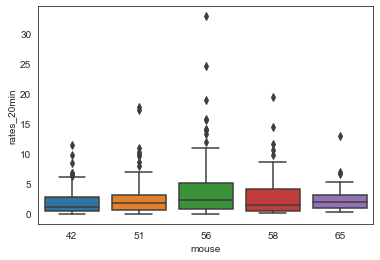

In [103]:
sns.boxplot(x='mouse',y='rates_20min',data=df)

<AxesSubplot:xlabel='mouse', ylabel='overall_rate'>

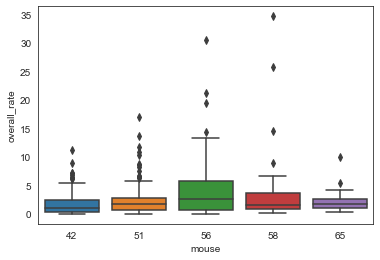

In [104]:
sns.boxplot(x='mouse',y='overall_rate',data=df)

In [119]:
df.mouse.unique()

array([42, 51, 56, 58, 65], dtype=int64)

In [118]:
for mid in df.mouse.unique():
    df_m = df[df.mouse==mid]
    df_fm = df_full[df_full.mouse==mid]
    
    pval = stats.mannwhitneyu(df_m.rates_20min,df_fm.rates_20min)
    print(pval)
print(df.groupby('mouse').rates_20min.sem())
print(df_full.groupby('mouse').rates_20min.sem())
print(df_full.groupby('mouse').rates_20min.mean())
print(df.groupby('mouse').rates_20min.mean())

MannwhitneyuResult(statistic=43168.5, pvalue=0.08439310509112967)
MannwhitneyuResult(statistic=21622.5, pvalue=0.9723669893547316)
MannwhitneyuResult(statistic=23504.5, pvalue=0.5060531936093402)
MannwhitneyuResult(statistic=6524.5, pvalue=0.3753185147445508)
MannwhitneyuResult(statistic=470.0, pvalue=0.46170183175850144)
mouse
42    0.141899
51    0.252193
56    0.447392
58    0.503435
65    0.689075
Name: rates_20min, dtype: float64
mouse
42    0.090379
51    0.166439
56    0.213066
58    0.195186
65    0.453802
Name: rates_20min, dtype: float64
mouse
42    2.165219
51    2.586516
56    3.453601
58    2.721412
65    3.545813
Name: rates_20min, dtype: float64
mouse
42    1.876393
51    2.561235
56    3.944294
58    2.910132
65    2.876367
Name: rates_20min, dtype: float64


In [170]:
df.groupby('mouse').overall_rate.mean()


mouse
42    1.701119
51    2.276367
56    3.947594
58    3.192551
65    2.624660
Name: overall_rate, dtype: float64

In [171]:
df.groupby('mouse').rates_20min.mean()


mouse
42    1.844559
51    2.390975
56    3.738744
58    2.877854
65    3.076716
Name: rates_20min, dtype: float64

In [181]:
#df_full
df.groupby('mouse').overall_rate.mean()

mouse
42    1.689748
51    2.275665
56    3.929045
58    3.112348
65    2.555343
Name: overall_rate, dtype: float64

In [182]:
np.shape(df)

(681, 21)

In [121]:
df.to_json(r'C:\Users\Kim\Documents\Data\daileydata\df_20min_autosremoved.json')